In [1]:
#import modules
import psycopg2 
from time import process_time 
from IPython.display import Image 
import matplotlib.pyplot as plt  
import numpy as np 
import pandas as pd 

In [2]:
#Function for queries with database
def execQuery(query,*printOption):
    try:
        connection = psycopg2.connect(user = "postgres",
                                      password = "1234",
                                      host = "localhost",
                                      port = "5432",
                                      database = "FakeNews")
        cursor = connection.cursor()
        cursor.execute(query)
        record = cursor.fetchall()
        return record
    except (Exception, psycopg2.Error) as error :
        connection = False
        print ("Error while connecting to PostgreSQL:", error)
    finally:
        if(connection):
            cursor.close()
            connection.close()
            if not printOption:
                print("Executed query and closed connection.")

## Counting articles in database 

In [3]:
#counting articles
query0 = """
SELECT COUNT(*)
FROM wiki_article
"""

res0 = execQuery(query0)
res0

Executed query and closed connection.


[(7474,)]

## Histogram of articles over publish years

In [4]:
query = """
SELECT COUNT(*), EXTRACT(YEAR FROM time_stamp::date)
FROM wiki_article INNER JOIN wiki_time using (time_id)
GROUP BY EXTRACT(YEAR FROM time_stamp::date)
"""
years = execQuery(query)
years

Executed query and closed connection.


[(68, 2019.0),
 (68, 2016.0),
 (101, 2017.0),
 (708, 2009.0),
 (1130, 2007.0),
 (952, 2008.0),
 (1251, 2005.0),
 (1460, 2006.0),
 (62, 2018.0),
 (121, 2014.0),
 (588, 2010.0),
 (132, 2013.0),
 (105, 2015.0),
 (28, 2020.0),
 (345, 2011.0),
 (68, 2004.0),
 (230, 2012.0)]

These tuples are used to make a histogram

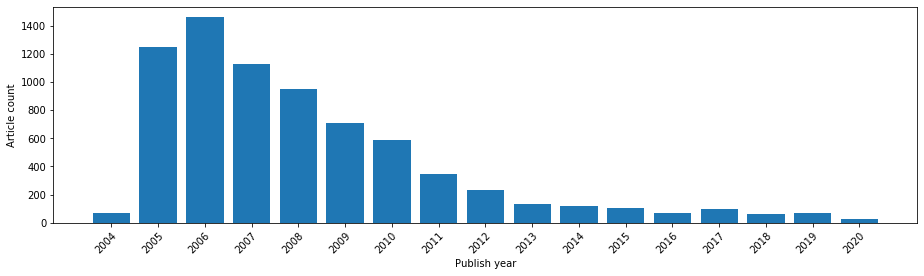

In [5]:
def makeChart():
    d = {year:cnt for (cnt,year) in years}
    
    year_lst = list(d)
    year_lst.sort()
    year_lst
    
    cnt_lst = [d[year] for year in year_lst]
    
    fig = plt.figure(figsize=(12,3))
    ax = fig.add_axes([0,0,1,1])
    ax.bar(list(map(str,list(map(int,year_lst)))),cnt_lst)
    ax.set_xlabel('Publish year')
    ax.set_ylabel('Article count')
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
makeChart()